In [3]:
#!pip install pandas

import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text
import os

In [4]:
conn = sqlite3.connect(r"C:\Users\dhanu\OneDrive\Desktop\Repo\VR_Training\module_2\database\VR.db")

In [5]:
cursor =  conn.cursor()


In [10]:
cursor.execute("SELECT * FROM employees")

In [11]:
for i in cursor.fetchall():
    print(i)

(1, 'John', 'Smith', 'john.smith@company.com', '2020-01-15', 95000, 1, None)
(2, 'Sarah', 'Johnson', 'sarah.johnson@company.com', '2019-03-22', 87000, 1, 1)
(3, 'Mike', 'Brown', 'mike.brown@company.com', '2021-06-10', 72000, 1, 1)
(4, 'Emily', 'Davis', 'emily.davis@company.com', '2020-09-05', 68000, 2, None)
(5, 'David', 'Wilson', 'david.wilson@company.com', '2018-11-30', 78000, 2, 4)
(6, 'Lisa', 'Anderson', 'lisa.anderson@company.com', '2022-02-14', 85000, 3, None)
(7, 'Tom', 'Taylor', 'tom.taylor@company.com', '2021-08-20', 65000, 3, 6)
(8, 'Anna', 'Martinez', 'anna.martinez@company.com', '2020-04-12', 62000, 4, None)
(9, 'Chris', 'Garcia', 'chris.garcia@company.com', '2019-07-08', 89000, 5, None)
(10, 'Jessica', 'Lee', 'jessica.lee@company.com', '2021-12-03', 71000, 1, 1)


In [12]:
cursor.fetchall()

[]

In [13]:
cursor.close()

In [19]:
cursor.execute("SELECT * from employees where salary > 70000")

In [20]:
for i in cursor.fetchall():
    print(i)

(1, 'John', 'Smith', 'john.smith@company.com', '2020-01-15', 95000, 1, None)
(2, 'Sarah', 'Johnson', 'sarah.johnson@company.com', '2019-03-22', 87000, 1, 1)
(3, 'Mike', 'Brown', 'mike.brown@company.com', '2021-06-10', 72000, 1, 1)
(5, 'David', 'Wilson', 'david.wilson@company.com', '2018-11-30', 78000, 2, 4)
(6, 'Lisa', 'Anderson', 'lisa.anderson@company.com', '2022-02-14', 85000, 3, None)
(9, 'Chris', 'Garcia', 'chris.garcia@company.com', '2019-07-08', 89000, 5, None)
(10, 'Jessica', 'Lee', 'jessica.lee@company.com', '2021-12-03', 71000, 1, 1)


In [6]:
import pandas as pd

sql_statement = "SELECT * from employees;"

In [7]:
df = pd.read_sql(sql=sql_statement,con=conn)

In [ ]:
SELECT * FROM employees WHERE first_name LIKE 'J%';

SELECT first_name as Fname FROM employees WHERE first_name='John';

select Fname from (Select first_name as fname from  employees) where fname='John';

In [29]:
df.loc[df['first_name'].str.startswith("J")]

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN
6,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0


SELECT first_name from employees;

In [34]:
df.loc[df['first_name']=='John']

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN


SELECT first_name, last_name, email FROM employees WHERE UPPER(first_name) = 'JOHN';

In [45]:
df[df['first_name'].str.upper()=='JOHN'][['first_name','last_name','email']]

,first_name,last_name,email
0,John,Smith,john.smith@company.com



SELECT first_name,hire_date FROM employees WHERE hire_date BETWEEN '2020-01-01' AND '2020-12-31' ORDER by hire_date DESC;

In [57]:
tmpdf=df[(df['hire_date']>'2020-01-01') & (df['hire_date']<'2020-12-31')]

In [61]:
tmpdf[["first_name","hire_date"]].sort_values(by='hire_date',ascending=False)

,first_name,hire_date
3,Emily,2020-09-05
7,Anna,2020-04-12
0,John,2020-01-15


In [62]:
df

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0
2,3,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0
3,4,Emily,Davis,emily.davis@company.com,2020-09-05,68000,2,NaN
4,5,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0
5,6,Lisa,Anderson,lisa.anderson@company.com,2022-02-14,85000,3,NaN
6,7,Tom,Taylor,tom.taylor@company.com,2021-08-20,65000,3,6.0
7,8,Anna,Martinez,anna.martinez@company.com,2020-04-12,62000,4,NaN
8,9,Chris,Garcia,chris.garcia@company.com,2019-07-08,89000,5,NaN
9,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0


In [66]:
df[df['manager_id'].notna()]

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0
2,3,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0
4,5,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0
6,7,Tom,Taylor,tom.taylor@company.com,2021-08-20,65000,3,6.0
9,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0


In [73]:
count_of_employee = int(df[(df['department_id']==1) & (df['salary']>=80000)]['employee_id'].count())

In [74]:
print(f"We have {count_of_employee} employees having salary more than 80000 in department_id 1")

We have 2 employees having salary more than 80000 in department_id 1


In [ ]:
df = df[['a','b']]

In [81]:
df=[df[df['manager_id'].isna()]]

In [83]:
df[0]

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN
3,4,Emily,Davis,emily.davis@company.com,2020-09-05,68000,2,NaN
5,6,Lisa,Anderson,lisa.anderson@company.com,2022-02-14,85000,3,NaN
7,8,Anna,Martinez,anna.martinez@company.com,2020-04-12,62000,4,NaN
8,9,Chris,Garcia,chris.garcia@company.com,2019-07-08,89000,5,NaN


In [12]:
mask = ((df['department_id']==1) | (df['department_id']==2)) & (df['salary']>70000) & (df['manager_id'].notna())

In [27]:
l = [1,2,4,5,7]
if 3 in l:
    print('1 is present in List')
else:
    print(False)

False


In [23]:
df

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0
2,3,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0
3,4,Emily,Davis,emily.davis@company.com,2020-09-05,68000,2,NaN
4,5,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0
5,6,Lisa,Anderson,lisa.anderson@company.com,2022-02-14,85000,3,NaN
6,7,Tom,Taylor,tom.taylor@company.com,2021-08-20,65000,3,6.0
7,8,Anna,Martinez,anna.martinez@company.com,2020-04-12,62000,4,NaN
8,9,Chris,Garcia,chris.garcia@company.com,2019-07-08,89000,5,NaN
9,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0


In [13]:
mask

0    False
1     True
2     True
3    False
4     True
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [24]:
df[mask]

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0
2,3,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0
4,5,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0
9,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0


In [32]:
not True

False

In [33]:
df[~df['department_id'].isin([1,4])]

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
3,4,Emily,Davis,emily.davis@company.com,2020-09-05,68000,2,NaN
4,5,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0
5,6,Lisa,Anderson,lisa.anderson@company.com,2022-02-14,85000,3,NaN
6,7,Tom,Taylor,tom.taylor@company.com,2021-08-20,65000,3,6.0
8,9,Chris,Garcia,chris.garcia@company.com,2019-07-08,89000,5,NaN


In [37]:
help(df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data is a S

In [38]:
df.sort_values(by=['department_id','salary'],ascending=[1,0])

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0
2,3,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0
9,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0
4,5,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0
3,4,Emily,Davis,emily.davis@company.com,2020-09-05,68000,2,NaN
5,6,Lisa,Anderson,lisa.anderson@company.com,2022-02-14,85000,3,NaN
6,7,Tom,Taylor,tom.taylor@company.com,2021-08-20,65000,3,6.0
7,8,Anna,Martinez,anna.martinez@company.com,2020-04-12,62000,4,NaN
8,9,Chris,Garcia,chris.garcia@company.com,2019-07-08,89000,5,NaN


In [47]:
df[df['department_id'].isin([1,4])]['salary'].sum()

np.int64(387000)

In [49]:
df[df['department_id'].isin([1,4])]

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0
2,3,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0
7,8,Anna,Martinez,anna.martinez@company.com,2020-04-12,62000,4,NaN
9,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0


In [51]:
df.head(2)

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0


In [64]:
l = [1,2,3]
l[0]
l[1:]
l[:-2]

l = [[1,2,3],[2,3,4],[4,5,6]]
l

[[1, 2, 3], [2, 3, 4], [4, 5, 6]]

In [65]:
df.columns

Index(['employee_id', 'first_name', 'last_name', 'email', 'hire_date',
       'salary', 'department_id', 'manager_id'],
      dtype='object')

In [ ]:
df.iloc[:,2]  # [row,col,skip]

0       Smith
1     Johnson
2       Brown
3       Davis
4      Wilson
5    Anderson
6      Taylor
7    Martinez
8      Garcia
9         Lee
Name: last_name, dtype: object

In [67]:
df.iloc[1:]

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0
2,3,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0
3,4,Emily,Davis,emily.davis@company.com,2020-09-05,68000,2,NaN
4,5,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0
5,6,Lisa,Anderson,lisa.anderson@company.com,2022-02-14,85000,3,NaN
6,7,Tom,Taylor,tom.taylor@company.com,2021-08-20,65000,3,6.0
7,8,Anna,Martinez,anna.martinez@company.com,2020-04-12,62000,4,NaN
8,9,Chris,Garcia,chris.garcia@company.com,2019-07-08,89000,5,NaN
9,10,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0


In [57]:
df.iloc[1:,[1,2]]

,first_name,last_name
1,Sarah,Johnson
2,Mike,Brown
3,Emily,Davis
4,David,Wilson
5,Lisa,Anderson
6,Tom,Taylor
7,Anna,Martinez
8,Chris,Garcia
9,Jessica,Lee


In [59]:
df.iloc[:,3:-2]

,email,hire_date,salary
0,john.smith@company.com,2020-01-15,95000
1,sarah.johnson@company.com,2019-03-22,87000
2,mike.brown@company.com,2021-06-10,72000
3,emily.davis@company.com,2020-09-05,68000
4,david.wilson@company.com,2018-11-30,78000
5,lisa.anderson@company.com,2022-02-14,85000
6,tom.taylor@company.com,2021-08-20,65000
7,anna.martinez@company.com,2020-04-12,62000
8,chris.garcia@company.com,2019-07-08,89000
9,jessica.lee@company.com,2021-12-03,71000


In [70]:
df['manager_id'].unique()

array([nan,  1.,  4.,  6.])

In [76]:
df[['department_id','manager_id']]

,department_id,manager_id
0,1,NaN
1,1,1.0
2,1,1.0
3,2,NaN
4,2,4.0
5,3,NaN
6,3,6.0
7,4,NaN
8,5,NaN
9,1,1.0


In [77]:
df['department_id'].nunique()

5

In [78]:
"ABC"+ ' '+ "BCD"

'ABC BCD'

In [82]:
df['full_name'] = df['first_name']+' '+df['last_name']

In [84]:
df.head(2)

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id,full_name
0,1,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN,John Smith
1,2,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0,Sarah Johnson


In [85]:
df['first_name'].str.len()

0    4
1    5
2    4
3    5
4    5
5    4
6    3
7    4
8    5
9    7
Name: first_name, dtype: int64

In [86]:
df['first_name'].str.upper()

0       JOHN
1      SARAH
2       MIKE
3      EMILY
4      DAVID
5       LISA
6        TOM
7       ANNA
8      CHRIS
9    JESSICA
Name: first_name, dtype: object

In [88]:
df['last_name'].str.lower()

0       smith
1     johnson
2       brown
3       davis
4      wilson
5    anderson
6      taylor
7    martinez
8      garcia
9         lee
Name: last_name, dtype: object

In [89]:
df['last_name'].str.capitalize()

0       Smith
1     Johnson
2       Brown
3       Davis
4      Wilson
5    Anderson
6      Taylor
7    Martinez
8      Garcia
9         Lee
Name: last_name, dtype: object

In [91]:
df['first_name'].str.replace("J","A")

0       Aohn
1      Sarah
2       Mike
3      Emily
4      David
5       Lisa
6        Tom
7       Anna
8      Chris
9    Aessica
Name: first_name, dtype: object

In [101]:
def return_data(x):
    return x[0]

In [103]:
#df['email'].str.split("@").apply(lambda x : x[0])
df['email'].str.split("@").apply(return_data)

0       john.smith
1    sarah.johnson
2       mike.brown
3      emily.davis
4     david.wilson
5    lisa.anderson
6       tom.taylor
7    anna.martinez
8     chris.garcia
9      jessica.lee
Name: email, dtype: object

In [100]:
d = "dhanush prasad"
d.split(" ")[0]

'dhanush'

In [107]:
round(df['salary']*1.05)

0    99750.0
1    91350.0
2    75600.0
3    71400.0
4    81900.0
5    89250.0
6    68250.0
7    65100.0
8    93450.0
9    74550.0
Name: salary, dtype: float64

In [108]:
abs(-100)

100

In [112]:
def salary_category(x):
    if x>=90000:
        return "High"
    if x >= 70000:
        return "Medium"
    else: return "Low"

df['salary_category']= df['salary'].apply(salary_category)

array([<Axes: ylabel='count'>], dtype=object)

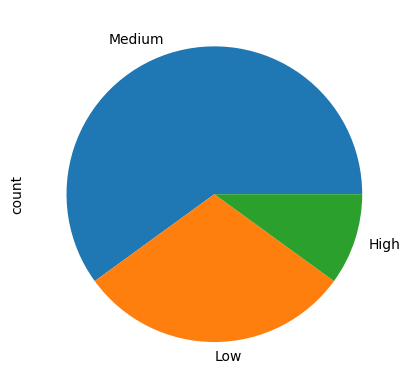

In [ ]:
df['salary_category'].value_counts().plot(kind='pie',subplots=True)

In [126]:
import pytz
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [130]:
ny_tz = pytz.timezone("America/New_York")

In [131]:
pd.Timestamp.now(tz=ny_tz)

Timestamp('2025-09-08 22:46:27.481900-0400', tz='America/New_York')

In [134]:
pd.Timestamp.now() + pd.Timedelta(days=5)

Timestamp('2025-09-14 08:20:02.610105')

In [138]:
date = '26-01-2021'

In [139]:
pd.to_datetime(date)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_42292\1702495809.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(date)


Timestamp('2021-01-26 00:00:00')

In [158]:
k = pd.Timestamp.today() - pd.to_datetime(df['hire_date'])

In [164]:
df['number_days_active'] = k.dt.days

<Axes: ylabel='first_name'>

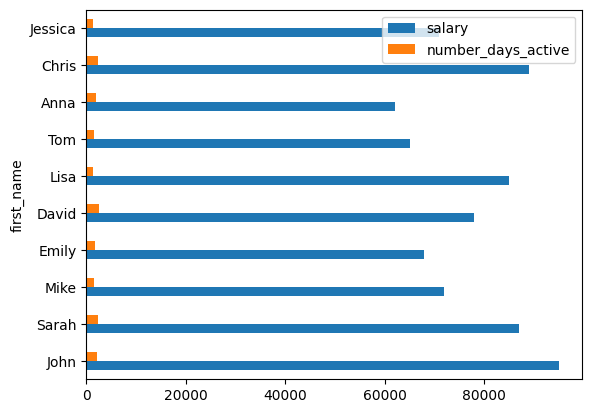

In [173]:
df[['first_name','number_days_active','salary']].plot(kind='barh',x='first_name',y=['salary','number_days_active'])

In [175]:
import pandas as pd
pd.options.plotting.backend =  "plotly"

In [177]:
df[['first_name','number_days_active','salary']].plot(kind='bar',x='first_name',y=['salary','number_days_active'])

In [180]:
df.to_excel("save.xlsx")

In [181]:
df.to_csv("save.csv")

In [191]:
df = pd.read_csv("save.csv")

In [194]:
df = df.rename(columns={"Unnamed: 0":"Dummy_INDEX"})

In [196]:
df = df.iloc[:,1:]

In [ ]:
df.shape #(n_rows, n_cols)

(10, 11)

In [189]:
df.shape[0]

10

In [197]:
df.count()

employee_id           10
first_name            10
last_name             10
email                 10
hire_date             10
salary                10
department_id         10
manager_id             5
full_name             10
salary_category       10
number_days_active    10
dtype: int64

In [199]:
int(df['manager_id'].count())

5

In [202]:
df.count()['manager_id']

np.int64(5)

In [204]:
df['salary'].sum()

np.int64(772000)

In [205]:
df['salary'].describe()

count       10.000000
mean     77200.000000
std      11272.385137
min      62000.000000
25%      68750.000000
50%      75000.000000
75%      86500.000000
max      95000.000000
Name: salary, dtype: float64

In [207]:
df.describe()

,employee_id,salary,department_id,manager_id,number_days_active
count,10.00000,10.000000,10.000000,5.000000,10.000000
mean,5.50000,77200.000000,2.300000,2.600000,1867.500000
std,3.02765,11272.385137,1.418136,2.302173,425.006993
min,1.00000,62000.000000,1.000000,1.000000,1303.000000
25%,3.25000,68750.000000,1.000000,1.000000,1498.750000
50%,5.50000,75000.000000,2.000000,1.000000,1903.000000
75%,7.75000,86500.000000,3.000000,4.000000,2207.250000
max,10.00000,95000.000000,5.000000,6.000000,2475.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         10 non-null     int64  
 1   first_name          10 non-null     object 
 2   last_name           10 non-null     object 
 3   email               10 non-null     object 
 4   hire_date           10 non-null     object 
 5   salary              10 non-null     int64  
 6   department_id       10 non-null     int64  
 7   manager_id          5 non-null      float64
 8   full_name           10 non-null     object 
 9   salary_category     10 non-null     object 
 10  number_days_active  10 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1012.0+ bytes


In [211]:
group_data = df.groupby(['department_id'])[['department_id','salary']]

In [213]:
import numpy as np
np.count_nonzero([1,3,4])

np.int64(3)

In [215]:
res_df  = group_data.agg({"department_id":np.count_nonzero,'salary':np.mean})

C:\Users\dhanu\AppData\Local\Temp\ipykernel_42292\71933563.py:1: FutureWarning:

The provided callable <function mean at 0x000002A05755ACA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [221]:
pd.options.plotting.backend = 'matplotlib'

array([<Axes: ylabel='salary'>], dtype=object)

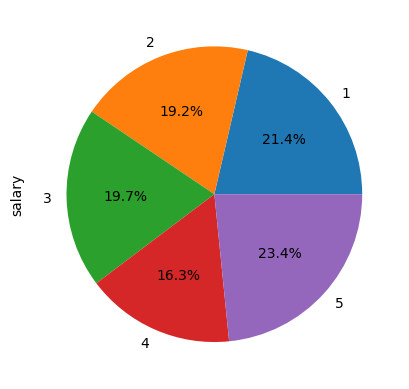

In [227]:
res_df['salary'].plot(kind='pie',subplots=True,autopct='%1.1f%%')

In [8]:
df['year'] = pd.to_datetime(df['hire_date']).dt.year

array([<Axes: ylabel='salary'>], dtype=object)

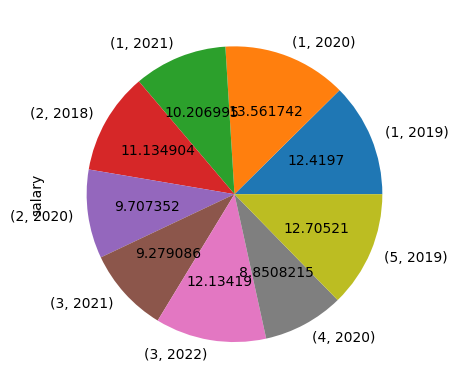

In [ ]:
df.groupby(['department_id','year'])['salary'].mean().plot(kind='pie',subplots=True,)

In [246]:
res_df=df.groupby(['department_id','year'])['salary'].mean().reset_index()

In [251]:
res_df

,department_id,year,salary
0,1,2019,87000.0
1,1,2020,95000.0
2,1,2021,71500.0
3,2,2018,78000.0
4,2,2020,68000.0
5,3,2021,65000.0
6,3,2022,85000.0
7,4,2020,62000.0
8,5,2019,89000.0


array([<Axes: ylabel='salary'>], dtype=object)

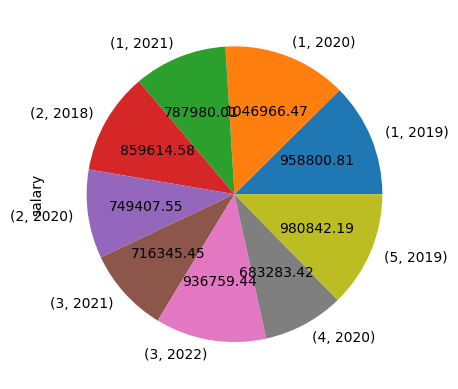

: 

In [ ]:
df.groupby(['department_id','year'])['salary'].mean().plot(kind='pie',subplots=True,autopct=lambda x: round(x*df['salary'].mean(),2))

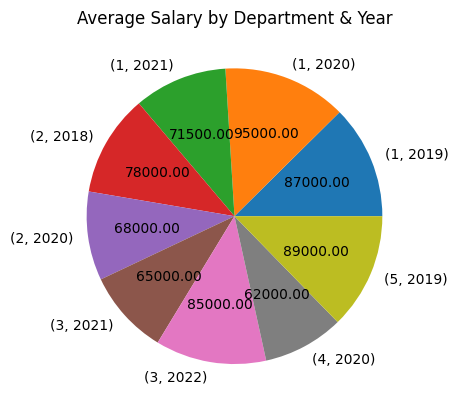

In [10]:
import matplotlib.pyplot as plt

# Calculate mean salaries per group
means = df.groupby(['department_id','year'])['salary'].mean()

# Function to return actual slice values
def actual_values(pct, allvals):
    total = sum(allvals)
    value = int(round(pct * total / 100.0))
    return f"{value:.2f}"

# Plot pie chart with actual values displayed
means.plot(
    kind='pie',
    autopct=lambda pct: actual_values(pct, means.values)
)

plt.ylabel("")  # remove automatic y-label
plt.title("Average Salary by Department & Year")
plt.show()


In [15]:
12.5*sum(means.values)/100

np.float64(87562.5)

In [19]:
df['employee_id'] = df['employee_id'].astype("float")

In [20]:
df

,employee_id,first_name,last_name,email,hire_date,salary,department_id,manager_id,year
0,1.0,John,Smith,john.smith@company.com,2020-01-15,95000,1,NaN,2020
1,2.0,Sarah,Johnson,sarah.johnson@company.com,2019-03-22,87000,1,1.0,2019
2,3.0,Mike,Brown,mike.brown@company.com,2021-06-10,72000,1,1.0,2021
3,4.0,Emily,Davis,emily.davis@company.com,2020-09-05,68000,2,NaN,2020
4,5.0,David,Wilson,david.wilson@company.com,2018-11-30,78000,2,4.0,2018
5,6.0,Lisa,Anderson,lisa.anderson@company.com,2022-02-14,85000,3,NaN,2022
6,7.0,Tom,Taylor,tom.taylor@company.com,2021-08-20,65000,3,6.0,2021
7,8.0,Anna,Martinez,anna.martinez@company.com,2020-04-12,62000,4,NaN,2020
8,9.0,Chris,Garcia,chris.garcia@company.com,2019-07-08,89000,5,NaN,2019
9,10.0,Jessica,Lee,jessica.lee@company.com,2021-12-03,71000,1,1.0,2021


In [32]:
import numpy as np
df.groupby(['department_id'])[['employee_id','salary']].agg(
    {
        "employee_id":np.count_nonzero,
        "salary":np.mean
    }
).query("employee_id > 2")

C:\Users\dhanu\AppData\Local\Temp\ipykernel_23468\48949584.py:2: FutureWarning: The provided callable <function mean at 0x000001F8FB6CCEA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['department_id'])[['employee_id','salary']].agg(


,employee_id,salary
department_id,,
1,4,81250.0


C:\Users\dhanu\AppData\Local\Temp\ipykernel_23468\2097603498.py:2: FutureWarning: The provided callable <function mean at 0x000001F8FB6CCEA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tmp_df.groupby(['department_id'])[['employee_id','salary']].agg(


<Axes: xlabel='department_id'>

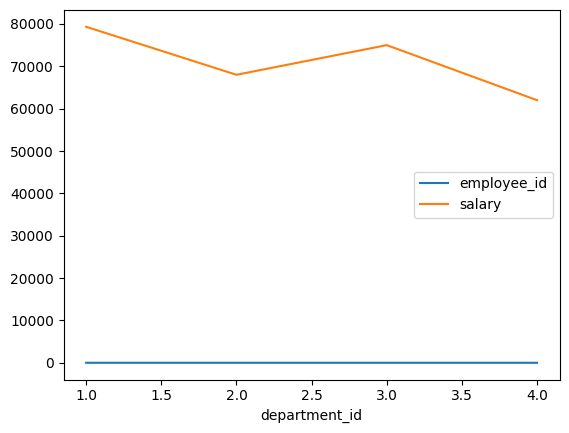

In [37]:
tmp_df = df[df['hire_date']>'2020-01-01']
tmp_df.groupby(['department_id'])[['employee_id','salary']].agg(
    {
        "employee_id":np.count_nonzero,
        "salary":np.mean
    }
).query("salary > 60000").plot(kind='line')

In [43]:
[[1,2,3],[3,4,5]]

[[1, 2, 3], [3, 4, 5]]

In [53]:
sdf  =df['salary'].sort_values()

In [61]:
abs(sdf-sdf.shift(1)).rolling(2).mean()

7       NaN
6       NaN
3    3000.0
9    3000.0
2    2000.0
4    3500.0
5    6500.0
1    4500.0
8    2000.0
0    4000.0
Name: salary, dtype: float64